# Demonstração da Aplicação Braillingo
****

## Importação dos Pacotes
***

In [1]:
from image_generator import image_generator # pacote para geração de imagens em braille
from obr import optical_braille_recognition # pacote de detecção de caracteres em imagens
import matplotlib.pyplot as plt # pacote de visualização gráfica
import numpy as np # pacote de operações matriciais
import tensorflow as tf # pacote de inteligência artificial e aprendizado de máquina 
import cv2 # importando pacote de visão computacional

## Geração das Imagens de Teste
***

In [2]:
def demo_input_text(string_txt, caractere_separator = ','):
    '''
    separa uma string de texto em várias linhas a partir de um separador 

    Args:
        string_txt (str) --> string de texto
        caractere_separator (str) --> caractere que indica uma quebra de linha na string

    Returns:
        list_txts (list) --> lista contendo as linhas do texto separadas
    '''

    max_len = max_len_string(string_txt.split(caractere_separator))

    list_txts = list()
    for string in string_txt.split(caractere_separator):
        if len(string) < max_len:
            while len(string) < max_len:
                string += ' '
        list_txts.append(string)
    
    return list_txts

In [3]:
def max_len_string(list_strings):
    '''
    retorna a quantidade de caracteres do maior elemento da lista de strings

    Args:
        list_strings (list) --> lista de strings

    Returns:
        lenght (int) --> quantidade de caracteres da maior string na lista 
    '''

    lenght = 0
    for string in list_strings:
        if len(string) > lenght:
            lenght = len(string)
    
    return lenght

Text(0.5, 1.0, 'francinildo\nfigueiredo\nalysson')

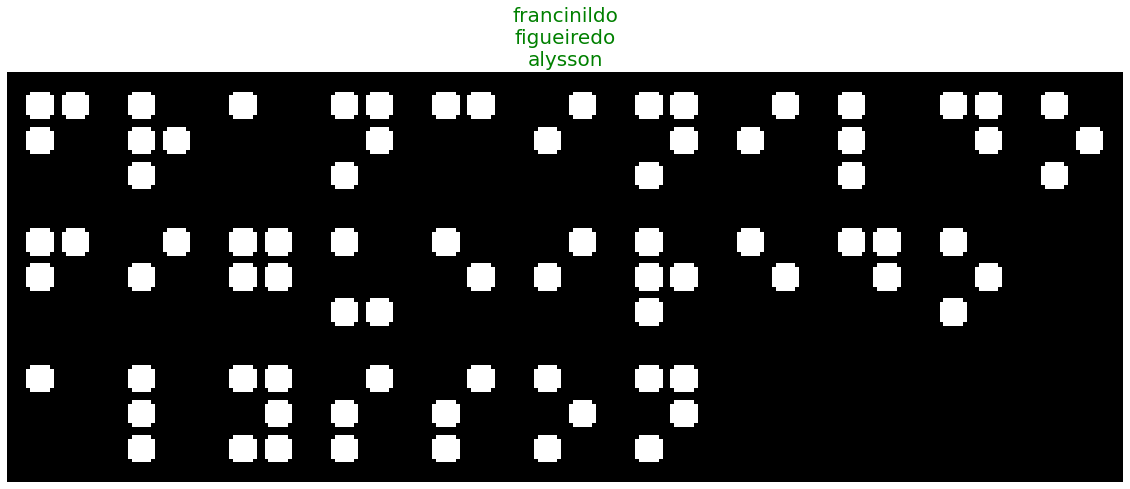

In [130]:
# carregando um texto digitado pelo usuário
string_input = input("Insira o texto: ")
# separando o texto em várias linhas 
string_list = demo_input_text(string_input.replace(', ', ','), ',')
# plotando uma imagem em braille com base no texto fornecido  
image = image_generator().string_to_column_braille(string_list)

# visualizando a imagem gerada pelo algoritmo
plt.figure(figsize = (20, 10))
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.title(string_input.replace(', ', '\n'), size = 20, color = 'green')

Text(0.5, 1.0, 'Delimitadores dos Pontos')

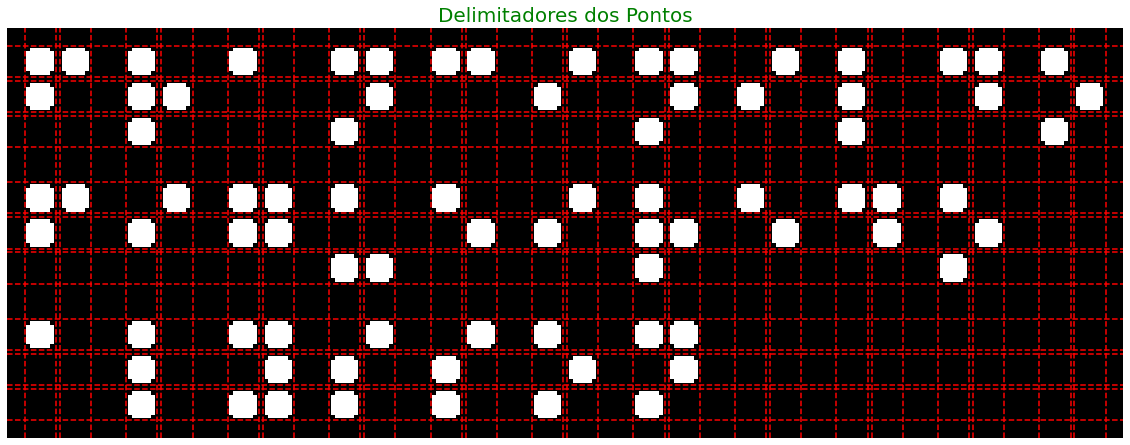

In [147]:
# plotando o histograma das abscissas e das ordenadas com base na imagem gerada
hist_x = optical_braille_recognition().make_histogram_x(image) 
hist_y = optical_braille_recognition().make_histogram_y(image)
del_x = optical_braille_recognition().get_delimiters(hist_x)
del_y = optical_braille_recognition().get_delimiters(hist_y)

# visualizando a imagem gerada pelo algoritmo
plt.figure(figsize = (20, 10))
plt.imshow(image, cmap = 'gray')

for x in del_x:
    plt.axvline(x, color = 'red', linestyle = '--')

for y in del_y:
    plt.axhline(y, color = 'red', linestyle = '--')


plt.axis('off')
plt.title('Delimitadores dos Pontos', size = 20, color = 'green')

## Separação e Classificação dos Caracteres
***

In [6]:
def plot_hist(hist, mode = 'Vertical', sub = False):
    '''
    plota histogramas de projeção

    Args:
        hist (array) --> histograma de projeção horizontal ou vertical
        mode (string) --> modo de projeção: 'horizontal' e 'vertical' 
    '''
    plt.figure(figsize = (20, 4))
    plt.plot(np.arange(0, len(hist)), hist)

    delimiters = optical_braille_recognition().get_delimiters(hist)

    for delimiter in delimiters:
        plt.axvline(delimiter, linestyle = ':', alpha = 0.8, color = 'red')

    if mode == 'Vertical':
        line_delimiters = optical_braille_recognition().get_line_delimiters(delimiters)
        for delimiter in line_delimiters:
            plt.axvline(delimiter, color = 'green')
    elif mode == 'Horizontal' and sub ==True:
        line_delimiters = optical_braille_recognition().get_character_delimiters(delimiters)
        for delimiter in line_delimiters:
            plt.axvline(delimiter, color = 'green')


    plt.axis('off')

    if sub == False:
        title_complete = 'Imagem Completa'
    else:
        title_complete = 'Linha Individual'
        
    plt.title('Histograma de Projeção ' + mode + ' - ' + title_complete, size = 20, color = 'green')

    if mode == 'Vertical':
        return line_delimiters

    return

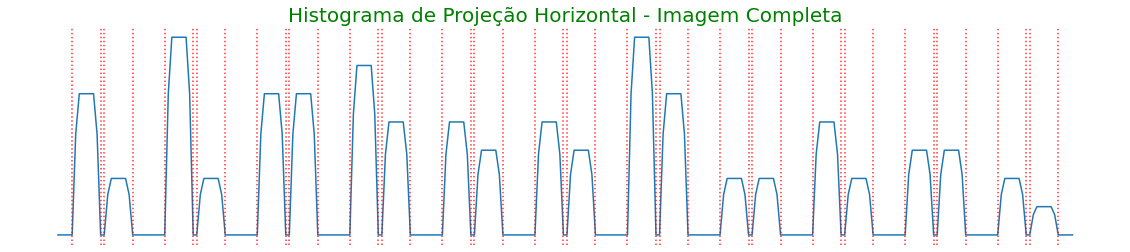

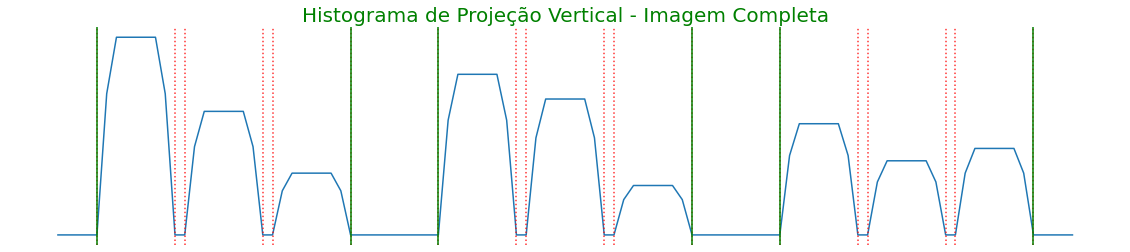

In [132]:
# plotando os histogramas de projeção horizontal e vertical
plot_hist(hist_x, mode = 'Horizontal')
line_delimiters = plot_hist(hist_y, mode = 'Vertical')

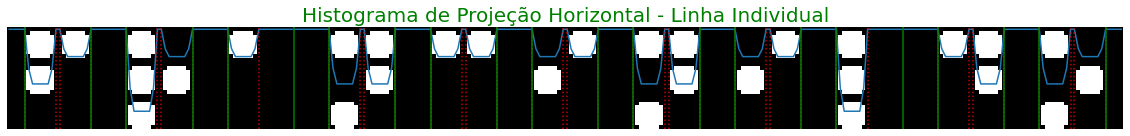

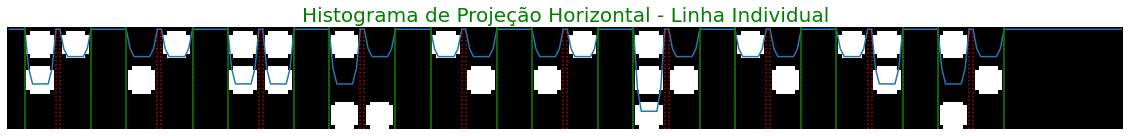

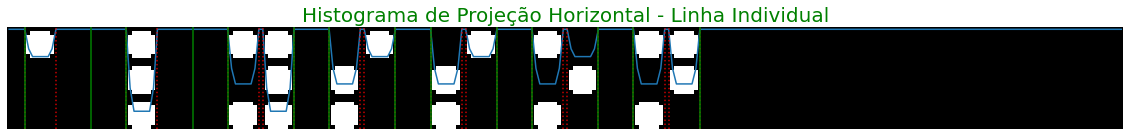

In [143]:
line_subimages = optical_braille_recognition().get_line_subimages(image, line_delimiters)

count = 1
for subimage in line_subimages:
    hist_x_sub = optical_braille_recognition().make_histogram_x(subimage)
    plot_hist(hist_x_sub, 'Horizontal', sub = True)
    plt.imshow(subimage, cmap = 'gray')

In [27]:
def encode(argmax):
    '''
    rótula a predição do modelo de classificação de caracteres em braille

    Args:
        argmax (int) --> índice do argumento máximo da predição

    Returns:
        label (string) --> rotulação do argumento máximo
    '''

    return 'abcdefghijklmnopqrstuvwxyz'[argmax]

In [160]:
def plot_subimages(subimages, model):
    '''
    função que plota os caracteres detectados da imagem

    Args:
        subimages (list) --> list de caracteres em braille  agrupados em palavras
    '''

    aux = list()
    for i in range(0, len(subimages)):
        aux.append(len(subimages[i]))
    max = np.max(aux)

    fig, axs = plt.subplots(nrows=len(subimages), ncols=max, figsize=(16,16))

    translate = ''
    for i in range(len(subimages)):
        for j in range(max):
            if j < len(subimages[i]):
                if len(subimages) > 1:
                    axs[i][j].imshow(subimages[i][j], cmap='gray')
                    img = cv2.resize(subimages[i][j], (24, 33),cv2.INTER_NEAREST)
                    img = np.reshape(img, (1, 33, 24))
                    predict = model.predict(img)
                    axs[i][j].set_title(encode(np.argmax(predict)), size = 20, color = 'green')
                    translate += encode(np.argmax(predict))
                else:
                    axs[j].imshow(subimages[i][j], cmap='gray')
                    img = cv2.resize(subimages[i][j], (24, 33),cv2.INTER_NEAREST)
                    img = np.reshape(img, (1, 33, 24))
                    predict = model.predict(img)
                    axs[j].set_title(encode(np.argmax(predict)), size = 20, color = 'green')
                    translate += encode(np.argmax(predict))

            else:
                axs[i][j].imshow(np.zeros(subimages[0][0].shape), cmap='gray')

            if len(subimages) > 1:
                axs[i][j].axis('off')
            else:
                 axs[j].axis('off')

        translate += ' '
    
    plt.suptitle('Tradução do Modelo: ' + translate[0:-1], size = 20, color = 'green')

    return translate

In [127]:
# detectando os caracteres em braille agrupados em palavras
subimages = optical_braille_recognition().optical_braille_recognition(image)
# carregando o modelo de classificação  
model = tf.keras.models.load_model('../classifier-cnn/obr-classifier')

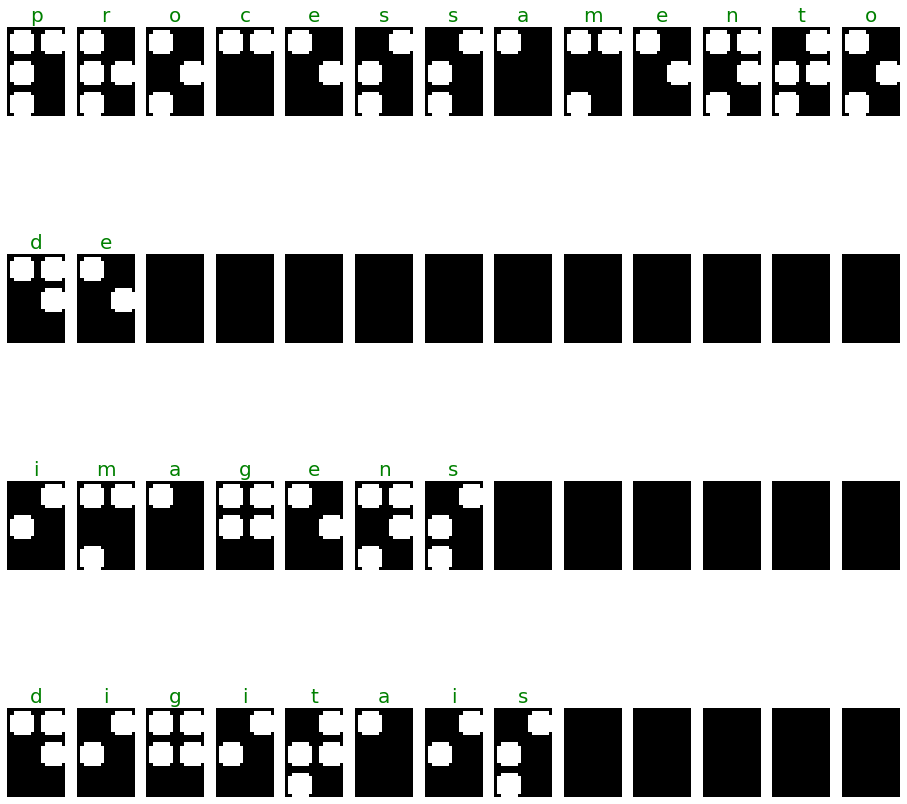

In [128]:
# visualizando os caracteres detectados
translate = plot_subimages(subimages, model)

In [129]:
# visualizando a tradução do modelo
print('Tradução do Modelo:', translate[0:-1])

Tradução do Modelo: processamento de imagens digitais


## Aplicação de Teste
***

In [159]:
def main(model):

    # carregando um texto digitado pelo usuário
    string_input = input("Insira o texto: ")
    # separando o texto em várias linhas 
    string_list = demo_input_text(string_input.replace(', ', ','), ',')
    # plotando uma imagem em braille com base no texto fornecido  
    image = image_generator().string_to_column_braille(string_list)

    # visualizando a imagem gerada pelo algoritmo
    plt.figure(figsize = (20, 10))
    plt.imshow(image, cmap = 'gray')
    plt.axis('off')
    plt.title(string_input.replace(', ', '\n'), size = 20, color = 'green')
    plt.figure()

    # plotando o histograma das abscissas e das ordenadas com base na imagem gerada
    hist_x = optical_braille_recognition().make_histogram_x(image) 
    hist_y = optical_braille_recognition().make_histogram_y(image)
    del_x = optical_braille_recognition().get_delimiters(hist_x)
    del_y = optical_braille_recognition().get_delimiters(hist_y)

    # visualizando a imagem gerada pelo algoritmo
    plt.figure(figsize = (20, 10))
    plt.imshow(image, cmap = 'gray')

    for x in del_x:
        plt.axvline(x, color = 'red', linestyle = '--')

    for y in del_y:
        plt.axhline(y, color = 'red', linestyle = '--')

    plt.axis('off')
    plt.title('Delimitadores dos Pontos', size = 20, color = 'green')
    plt.figure()

    # plotando os histogramas de projeção horizontal e vertical
    plot_hist(hist_x, mode = 'Horizontal')
    line_delimiters = plot_hist(hist_y, mode = 'Vertical')

    line_subimages = optical_braille_recognition().get_line_subimages(image, line_delimiters)

    for subimage in line_subimages:
        hist_x_sub = optical_braille_recognition().make_histogram_x(subimage)
        plot_hist(hist_x_sub, 'Horizontal', sub = True)
        plt.imshow(subimage, cmap = 'gray')

    # detectando os caracteres em braille agrupados em palavras
    subimages = optical_braille_recognition().optical_braille_recognition(image)

    
    # visualizando os caracteres detectados
    translate = plot_subimages(subimages, model)

    # visualizando a tradução do modelo
    print('Tradução do Modelo:', translate[0:-1])

    return 

Tradução do Modelo: processamento de imagens digitais


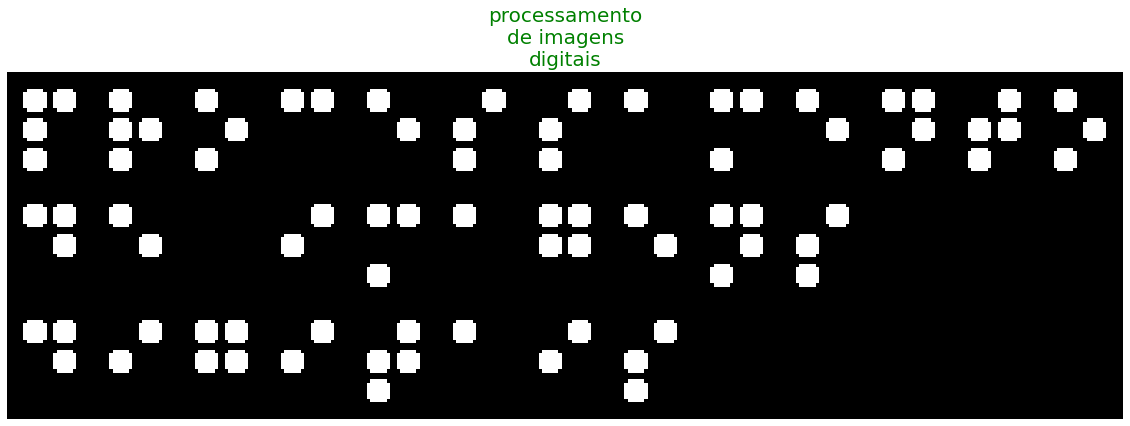

<Figure size 432x288 with 0 Axes>

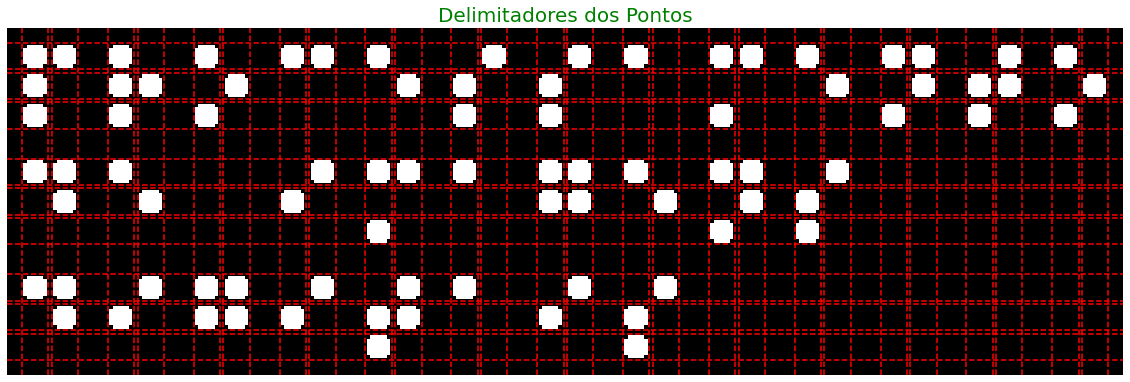

<Figure size 432x288 with 0 Axes>

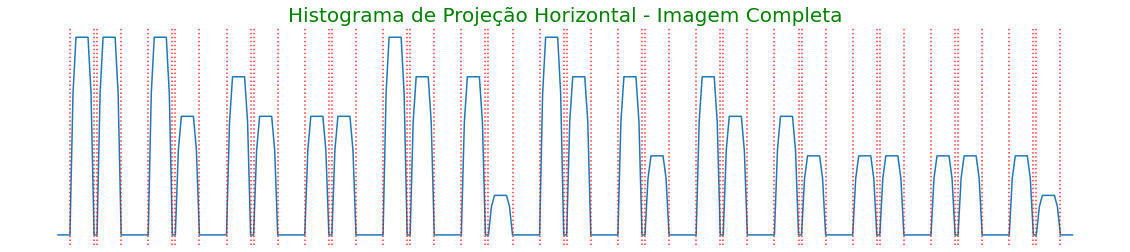

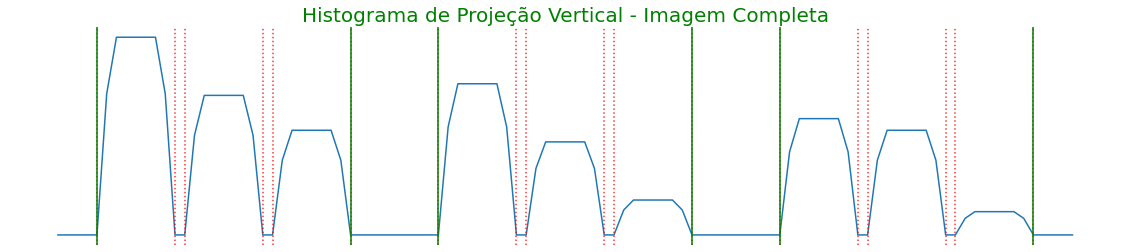

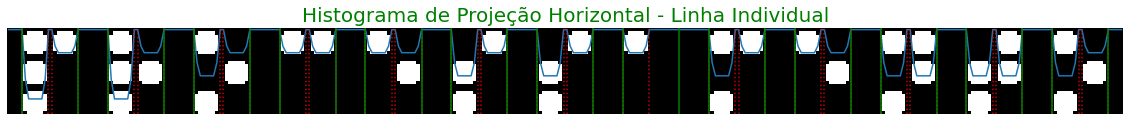

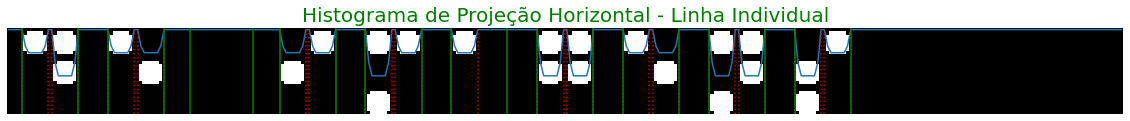

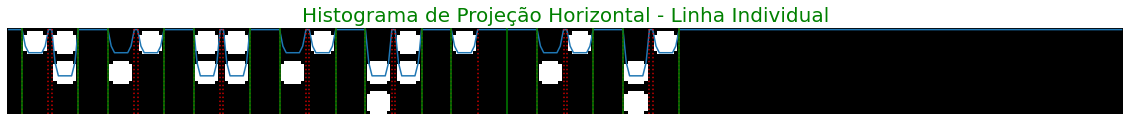

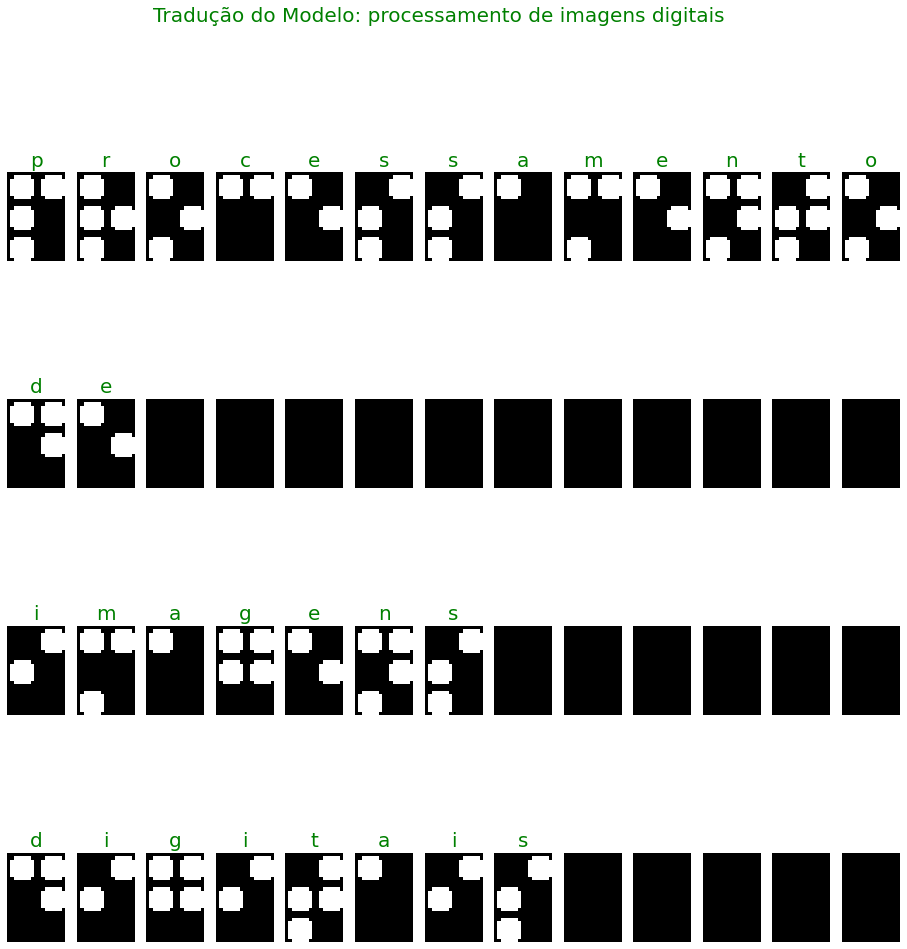

In [161]:
# visualizando uma demonstração do projeto braillingo
main(model)